In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import pylab

%matplotlib inline
%load_ext cython


In [2]:
def Distance8(picArr1):#asumimos que ambas imagenes son del mismo tamaño
    orx = 1
    ory = 1
    H = picArr1.shape[0]
    W = picArr1.shape[1]
    mask1 = np.array([[255, 255, 255],
             [255, 255, 1],
             [1, 1, 1]],np.intc)
    maskCruz4 = np.array([[1, 1, 1],
                [1, 255, 255],
             [255, 255, 255]],np.intc)
    maskHeight = mask1.shape[0]
    maskWidth = mask1.shape[1]
    tampadH = H + ( 2 * orx )
    tampadW = W + ( 2 * ory )
    b = np.zeros((tampadH , tampadW ) , np.intc)
    b [1:H+1, 1:W+1] = picArr1
    
    #Creamos una matriz auxiliar, sera una copia del arreglo que tomamos como input pero con un marco alrededor
    #El marco debe ser suficientemente grande para poder realizar las operaciones sin conflictos
    #El marco se llena con ceros para que no afecte nuestras operaciones
    
    #forward propagation
    for i in range(1,H-1 ):
        for j in range(1, W-1 ):
            if(b[i][j]>0):
                aux = maskCruz4 + b[i-1:i+maskHeight-1, j-1:j+maskWidth-1]
                #print( i,j,aux )
                b[i][j] = np.amin( aux )
    
    #backward propagation
    for i in range(H-1,1, -1 ):
        for j in range(W-1, 1,-1 ):
            if(b[i][j]>0):
                aux = mask1 + b[i-1:i+maskHeight-1, j-1:j+maskWidth-1]
                #print( aux )
                b[i][j] = min(b[i][j], np.amin( aux ) )
    
    return b

def Distance4(picArr1):#asumimos que ambas imagenes son del mismo tamaño
    orx = 1
    ory = 1
    H = picArr1.shape[0]
    W = picArr1.shape[1]
    maskCruz3 = np.array([[255, 255, 255],
             [255, 255, 1],
             [255, 1, 255]],np.intc)
    maskCruz4 = np.array([[255, 1, 255],
             [1, 255, 255],
             [255, 255, 255]],np.intc)
    maskHeight = maskCruz3.shape[0]
    maskWidth = maskCruz3.shape[1]
    tampadH = H + ( 2 * orx )
    tampadW = W + ( 2 * ory )
    b = np.zeros((tampadH , tampadW ) , np.intc)
    b [1:H+1, 1:W+1] = picArr1
    
    #Creamos una matriz auxiliar, sera una copia del arreglo que tomamos como input pero con un marco alrededor
    #El marco debe ser suficientemente grande para poder realizar las operaciones sin conflictos
    #El marco se llena con ceros para que no afecte nuestras operaciones
    
    #forward propagation
    for i in range(1,H-1 ):
        for j in range(1, W-1 ):
            if(b[i][j]>0):
                aux = maskCruz4 + b[i-1:i+maskHeight-1, j-1:j+maskWidth-1]
                #print( i,j,aux )
                b[i][j] = np.amin( aux )
    
    #backward propagation
    for i in range(H-1,1, -1 ):
        for j in range(W-1, 1,-1 ):
            if(b[i][j]>0):
                aux = maskCruz3 + b[i-1:i+maskHeight-1, j-1:j+maskWidth-1]
                #print( aux )
                b[i][j] = min(b[i][j], np.amin( aux ) )
    
    return b

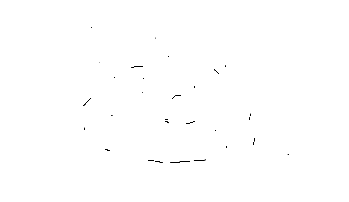

In [3]:
bin1=Image.open("../img/bin3.png").convert("L") #Open the image and convert to gray scale 
bin2=Image.open("../img/bin4.png").convert("L") #Open the image and convert to gray scale 
bin_arr1 = np.asarray(bin1,np.intc) #converts the image to an Numpy Array
bin_arr2 = np.asarray(bin2,np.intc) #converts the image to an Numpy Array

plt.imshow(bin_arr1,cmap=plt.cm.gray)
plt.axis('off')
plt.show()


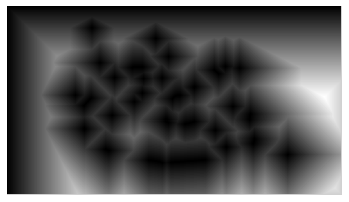

In [4]:
new_image = Distance4(bin_arr1)

plt.imshow(new_image, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

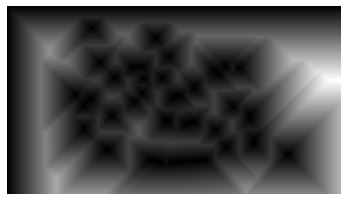

In [5]:
new_image2 = Distance8(bin_arr1)

plt.imshow(new_image2, cmap=plt.cm.gray)
plt.axis('off')
plt.show()